# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [ ]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [1]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install unidecode

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

#import folium
from tqdm.notebook import tqdm
from nba_api.stats.endpoints import (commonallplayers,commonplayerinfo,playercareerstats,playerprofilev2)
from unidecode import unidecode
from datetime import date
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt




In [4]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():
    current_players=commonallplayers.CommonAllPlayers(is_only_current_season=1, league_id='00', season='2021-22').get_data_frames()[0]
    current_players = current_players[(current_players["TEAM_ID"] != 0) & (current_players["GAMES_PLAYED_FLAG"] != "N") & (current_players["PERSON_ID"] != 1630597)]
    current_players=current_players.iloc[:,[0,2,10]]
    current_players.set_index('PERSON_ID', drop=True, inplace=True)
    current_players.rename(columns={'DISPLAY_FIRST_LAST':'PLAYER_NAME'},inplace=True)
    return current_players

In [5]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [9]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

def get_players_personal_information(current_players_list):
    players_personal_info=pd.DataFrame()

    try:
        for position,id_player in tqdm(enumerate(current_players_list.index)):
            data=commonplayerinfo.CommonPlayerInfo(player_id=id_player).get_data_frames()[0]
            players_personal_info = pd.concat([players_personal_info, data])
            time.sleep(0.4)
            if position % 100==0 and position !=0:
                print(f'Tracking position: {position}')
        print(f'All records were read correctly')
        players_personal_info.set_index('PERSON_ID',drop=True,inplace=True)
        players_personal_info=players_personal_info[["DISPLAY_FIRST_LAST","TEAM_NAME","POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]]
        players_personal_info.rename(columns={'DISPLAY_FIRST_LAST':'PLAYER_NAME'},inplace=True)
        
    except:
        print(f'API Stop at position: {position}')
    
    finally:
        return players_personal_info
        

In [10]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")


API Stop at position: 23


3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [81]:
### Complete in this cell: find players career stats, save to csv file

def get_players_career_stats(current_players_list):
    players_career_stats=pd.DataFrame()

    try:
        for position,id_player in enumerate(current_players_list.index):
         
            data = playercareerstats.PlayerCareerStats(player_id=id_player,per_mode36='PerGame').career_totals_regular_season.get_data_frame()
            players_career_stats=pd.concat([players_career_stats,data])
            time.sleep(0.5)         
            if position % 100==0 and position !=0:
                print(f'Tracking position: {position}')
                
        print(f'All records were read correctly')
        players_career_stats=players_career_stats[["PLAYER_ID","GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]]
        
    except:
        print(f'API Stop at position: {position}')
    finally:
        return players_career_stats

In [82]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

Tracking position: 100
Tracking position: 200
Tracking position: 300
Tracking position: 400
Tracking position: 500
All records were read correctly


4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [84]:
### Complete in this cell: find players next game

def get_players_next_game(current_players_list):
    players_next_game=pd.DataFrame()

    try:
        for position,id_player in enumerate(current_players_list.index):
            data = playerprofilev2.PlayerProfileV2(player_id=id_player).next_game.get_data_frame()
            data['PLAYER_ID']=id_player
            if data.empty:
                data['PLAYER_ID']=id_player
                data['GAME_DATE']=np.nan

            data=data[['PLAYER_ID','GAME_DATE']]
            players_next_game=pd.concat([players_next_game,data])
            time.sleep(0.4)    
            if position % 100==0 and position !=0:
                print(f'Tracking position: {position}')
        print(f'All records were read correctly')
        players_next_game=players_next_game[["PLAYER_ID","GAME_DATE"]]
        players_next_game.set_index("PLAYER_ID",inplace=True,drop=True)
        
    except:
        print(f'API Stop at position: {position}')
    finally:
        return players_next_game

In [85]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("nba_players_next_game.csv")

Tracking position: 100
Tracking position: 200
Tracking position: 300
Tracking position: 400
Tracking position: 500
All records were read correctly


5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [87]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(csv_file_path):    
    nba_players_salaries=pd.read_html('https://www.basketball-reference.com/contracts/players.html',index_col=0)[0].droplevel(0,axis=1)
    nba_players_salaries=nba_players_salaries[['Player','2021-22']]
    nba_players_salaries.rename(columns={'2021-22':'SALARY'},inplace=True)
    nba_players_salaries.drop_duplicates(subset='Player',inplace=True)
    nba_players_salaries=nba_players_salaries[(nba_players_salaries.index!='Rk') & (nba_players_salaries.index.notna())]
    s=lambda x: unidecode(x)
    nba_players_salaries['Player']=nba_players_salaries['Player'].apply(s)
    
    return nba_players_salaries

In [88]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")

In [89]:
players_salaries

Rk,Player,SALARY
1,Stephen Curry,"$45,780,966"
2,John Wall,"$44,310,840"
3,Russell Westbrook,"$44,211,146"
4,James Harden,"$43,848,000"
5,LeBron James,"$41,180,544"
...,...,...
608,Skylar Mays,"$34,231"
611,Terry Taylor,"$21,270"
612,Duane Washington Jr.,"$21,270"
615,Trent Forrest,"$8,558"


6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [108]:
### Complete in this cell: merge the dataframes
def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    players_personal_career_stats=players_personal_info.merge(players_career_stats,left_on='PERSON_ID',right_on='PLAYER_ID')
    players_personal_career_stats_next_game=players_personal_career_stats.merge(players_next_game, left_on='PLAYER_ID', right_on='PLAYER_ID',how='left')
    players_personal_career_stats_next_game_salary=players_personal_career_stats_next_game.merge(players_salaries,left_on='PLAYER_NAME',right_on='Player',how='left')
    players_personal_career_stats_next_game_salary=players_personal_career_stats_next_game_salary[["PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER","GP", "MIN", "PTS", "REB", "AST", "STL", "BLK","GAME_DATE", "SALARY"]]
    return  players_personal_career_stats_next_game_salary

In [111]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [138]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(players_dataset):
    working_df=players_dataset.copy()
    working_df=working_df[(working_df['SALARY'].notna()) & (working_df['TEAM_NAME'].notna())]    
    return working_df

In [139]:
working_df = copy_and_delete_nan(raw_players_dataset)

2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [140]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    working_df['SALARY'].replace({"\$":"",",":""}, regex=True, inplace=True)
    working_df["SALARY"]=working_df["SALARY"].astype(int)
    working_df["BIRTHDATE"] = pd.to_datetime(working_df["BIRTHDATE"])
    working_df["GAME_DATE"] = pd.to_datetime(working_df["GAME_DATE"])

In [141]:
cast_columns(working_df)

3- Create a function that converts the height column from height in feet and inches to centimeters

In [142]:
### Complete in this cell: convert height column
def convert_height_column(working_df):
    working_df['HEIGHT']=working_df['HEIGHT'].apply(lambda x: int(round((int(x[0])*30.48) + (int(x[2:])*2.54))))

In [143]:
convert_height_column(working_df)

4- Create a function that converts the weight column from pounds to kilograms

In [144]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
    working_df['WEIGHT']=working_df['WEIGHT'].apply(lambda x: int(round((int(x)*0.4535924))))

In [145]:
convert_weight_column(working_df)

5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [147]:
### Complete in this cell: add age column
def add_age_column(working_df):
    working_df['AGE']=working_df["BIRTHDATE"].apply(lambda x: relativedelta(date.today(), x.date()))
    working_df['AGE']=working_df["AGE"].apply(lambda x: f"{x.years} years, {x.months} months, {x.days} days") 
  

In [148]:
add_age_column(working_df)

6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [149]:
### Complete in this cell: disambiguation of the position column
def update_position(working_df):
    working_df['POSITION']=working_df['POSITION'].apply(lambda x : x.split('-')[0])

In [150]:
update_position(working_df)

7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [151]:
working_df.reset_index(drop=True,inplace=True)
working_df.to_csv("nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [152]:
### Complete in this cell: print general metrics
#- Total number of players
print('--------------------------------------------------------------------------------------------')
print(f'Players: {working_df.shape[0]}')
print('--------------------------------------------------------------------------------------------')
# - Number of USA born players
print(f'USA born players: {working_df[working_df["COUNTRY"]=="USA"]["COUNTRY"].count()}')
print('--------------------------------------------------------------------------------------------')

#- Number of foreign players
print(f'Foreign players: {working_df[working_df["COUNTRY"]!="USA"]["COUNTRY"].count()}')
print('--------------------------------------------------------------------------------------------')

#- Number of players per position
display(working_df.groupby(by='POSITION')['POSITION'].count())
print('--------------------------------------------------------------------------------------------')

#- Number of players per team
display(working_df.groupby(by='TEAM_NAME')['TEAM_NAME'].count())
print('--------------------------------------------------------------------------------------------')

#- Number of rookies (first year players)
print(f"Quantity of rookies: {working_df[working_df['SEASON_EXP']==0].shape[0]}")
print('--------------------------------------------------------------------------------------------')



--------------------------------------------------------------------------------------------
Players: 446
--------------------------------------------------------------------------------------------
USA born players: 338
--------------------------------------------------------------------------------------------
Foreign players: 108
--------------------------------------------------------------------------------------------


POSITION
Center      59
Forward    175
Guard      212
Name: POSITION, dtype: int64

--------------------------------------------------------------------------------------------


TEAM_NAME
76ers            15
Bucks            14
Bulls            16
Cavaliers        16
Celtics          14
Clippers         13
Grizzlies        15
Hawks            14
Heat             15
Hornets          15
Jazz             15
Kings            15
Knicks           14
Lakers           15
Magic            15
Mavericks        15
Nets             15
Nuggets          14
Pacers           15
Pelicans         16
Pistons          14
Raptors          15
Rockets          15
Spurs            16
Suns             15
Thunder          15
Timberwolves     15
Trail Blazers    15
Warriors         15
Wizards          15
Name: TEAM_NAME, dtype: int64

--------------------------------------------------------------------------------------------
Quantity of rookies: 60
--------------------------------------------------------------------------------------------


In [153]:
#- Players description
print('--------------------------------------------------------------------------------------------')
#- Average player age (in years)
print(f"Average player age: {round(working_df['AGE'].apply(lambda x: int(x[:2])).mean(),2)}")
print('--------------------------------------------------------------------------------------------')

#- Youngest player age (years and days, i.e: 18 years and 16 days)
print(f"Youngest player age: {working_df['AGE'].min().split(',')[0] + working_df['AGE'].min().split(',')[2]}")

#- Oldest player age (years and days, i.e: 40 years and 160 days)
print('--------------------------------------------------------------------------------------------')
print(f"Oldest player age: {working_df['AGE'].max().split(',')[0] + working_df['AGE'].max().split(',')[2]}")
#- Min and Max players height
print('--------------------------------------------------------------------------------------------')
print(f'Min_height:{working_df["HEIGHT"].min()}, Max_height: {working_df["HEIGHT"].max()}')

#- Average height of players per position
print('--------------------------------------------------------------------------------------------')

print(f"Average Height per position : \n{working_df.groupby('POSITION')['HEIGHT'].mean()}")
print('--------------------------------------------------------------------------------------------')

    

--------------------------------------------------------------------------------------------
Average player age: 26.18
--------------------------------------------------------------------------------------------
Youngest player age: 19 years 25 days
--------------------------------------------------------------------------------------------
Oldest player age: 41 years 16 days
--------------------------------------------------------------------------------------------
Min_height:175, Max_height: 221
--------------------------------------------------------------------------------------------
Average Height per position : 
POSITION
Center     210.813559
Forward    203.051429
Guard      192.438679
Name: HEIGHT, dtype: float64
--------------------------------------------------------------------------------------------


In [154]:
### Complete in this cell: Contracts
#- Min and Max salary of all players
print('--------------------------------------------------------------------------------------------')
print(f"Max_Salary: ${working_df['SALARY'].max():,.2f},\nMin_Salary: ${working_df['SALARY'].min():,.2f}")
print('--------------------------------------------------------------------------------------------')
#- Mean and Median salary of all players
print(f"Mean_Salary: ${working_df['SALARY'].mean():,.2f}\nMedian_Salary: ${working_df['SALARY'].median():,.2f}")
print('--------------------------------------------------------------------------------------------')


--------------------------------------------------------------------------------------------
Max_Salary: $45,780,966.00,
Min_Salary: $5,318.00
--------------------------------------------------------------------------------------------
Mean_Salary: $8,728,325.71
Median_Salary: $4,405,080.00
--------------------------------------------------------------------------------------------


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

<AxesSubplot:xlabel='PTS', ylabel='SALARY'>

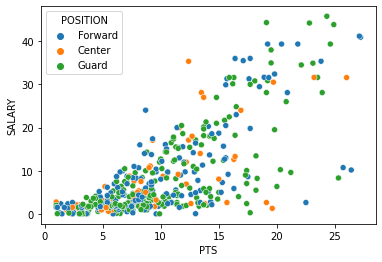

In [155]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
sns.scatterplot(x=working_df['PTS'],y=working_df['SALARY']/1000000,hue=working_df['POSITION'])

3- Now plot assists-vs-salary and rebounding-vs-salary

<AxesSubplot:xlabel='REB', ylabel='SALARY'>

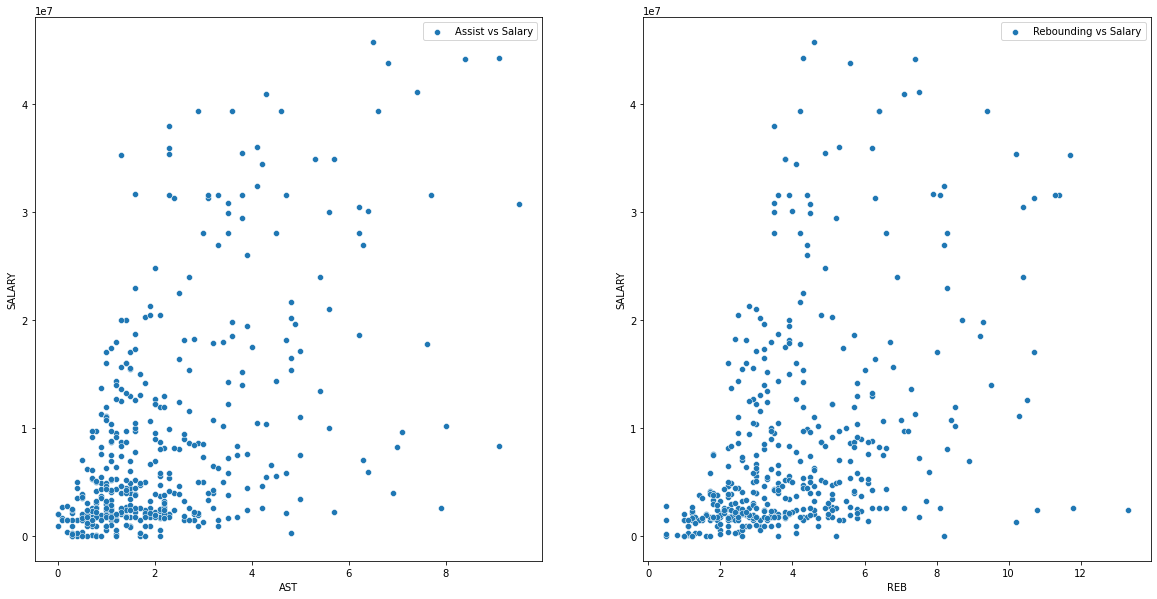

In [156]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary
plt.rcParams["figure.figsize"] = (20,10)
fig, axs = plt.subplots(ncols=2)
sns.scatterplot(data=working_df, x="AST", y="SALARY",label='Assist vs Salary',ax=axs[0])
sns.scatterplot(data=working_df, x="REB", y="SALARY",label='Rebounding vs Salary',ax=axs[1])

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

<AxesSubplot:xlabel='AST', ylabel='SALARY'>

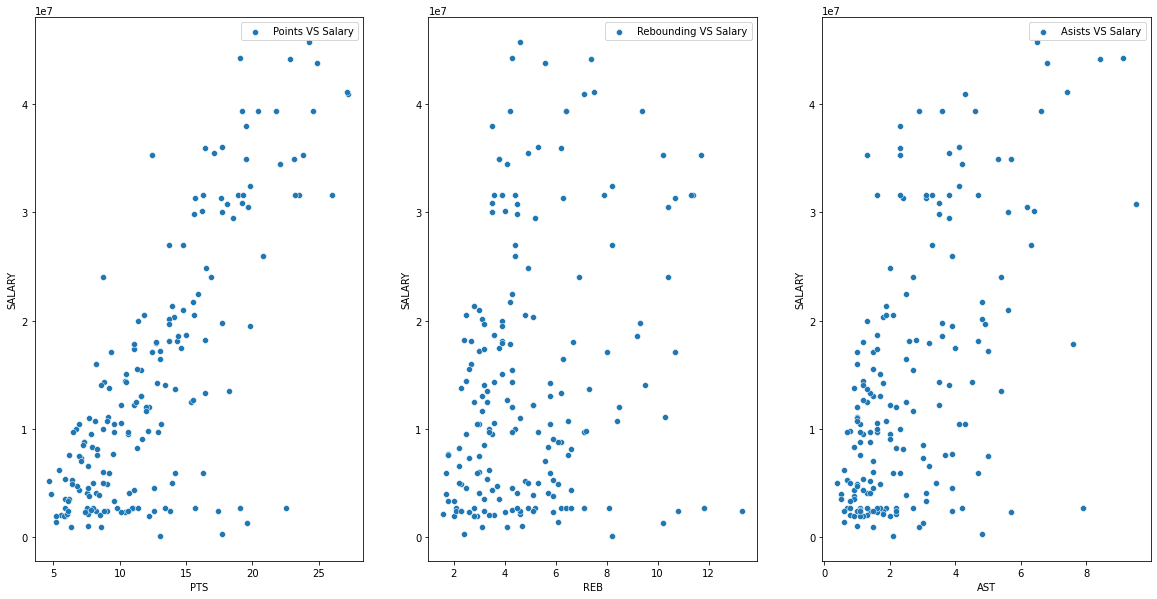

In [157]:
### Complete in this cell: non rookie contracts
working_df_without_rookies=working_df[working_df['SEASON_EXP']>4]
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=working_df_without_rookies,x='PTS',y='SALARY',label='Points VS Salary',ax=axs[0])
sns.scatterplot(data=working_df_without_rookies,x='REB',y='SALARY',label='Rebounding VS Salary',ax=axs[1])
sns.scatterplot(data=working_df_without_rookies,x='AST',y='SALARY',label='Asists VS Salary',ax=axs[2])


5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

<AxesSubplot:xlabel='POSITION', ylabel='PTS'>

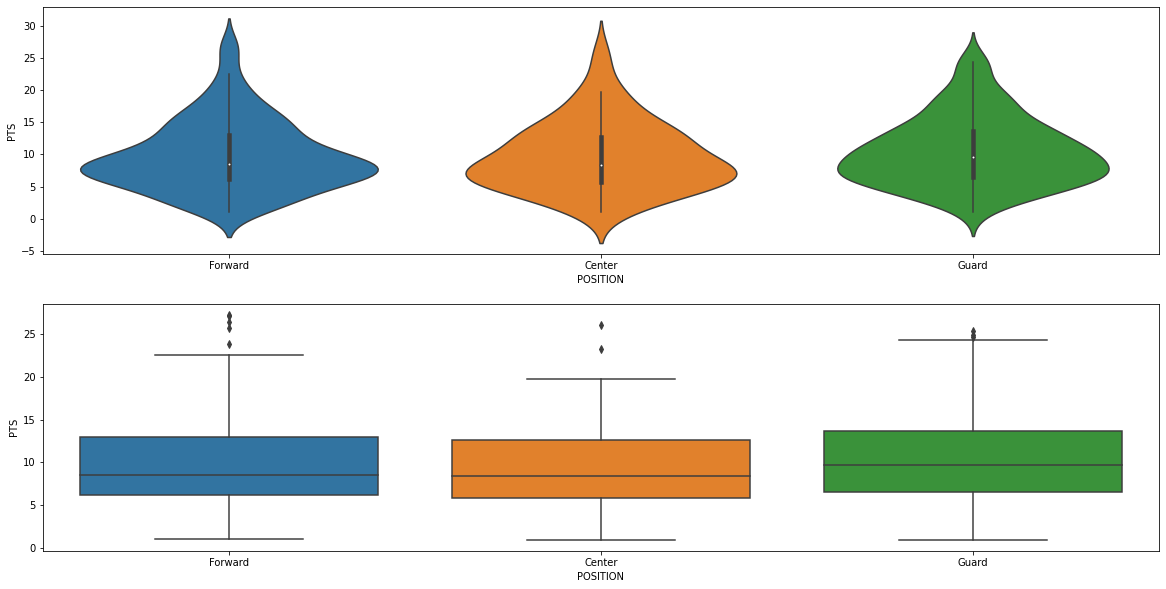

In [158]:
### Complete in this cell: Scoring average grouped by position
working_df_grouped=working_df.groupby('POSITION')['PTS'].mean()

fig, axs = plt.subplots(nrows=2)
sns.violinplot(data=working_df,x='POSITION', y='PTS',ax=axs[0])
sns.boxplot(data=working_df,x='POSITION', y='PTS',ax=axs[1])

6- Plot the Height distribution of all players

In [159]:
### Complete in this cell: height distribution
sns.histplot(data=working_df,x='HEIGHT',ax=axs[0])
sns.kdeplot(data=working_df,x='HEIGHT',ax=axs[1],fill=True)

<AxesSubplot:xlabel='POSITION', ylabel='PTS'>

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

In [161]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [1 lines of output]
  A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [160]:
working_df=working_df[['PLAYER_NAME','COUNTRY']]
working_df['PLAYER_NAME']=working_df['PLAYER_NAME'].astype(str)
working_df['COUNTRY']=working_df['COUNTRY'].astype(str)
working_df['COUNTRY']=working_df['COUNTRY'].apply(lambda x: x.replace('USA','United States of America') if x=='USA' else x)
working_df_group=working_df.groupby('COUNTRY').count()
working_df_group['COUNTRY_2']=working_df_group.index


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
table = world.merge(working_df_group, how="left", left_on=['name'], right_on=['COUNTRY_2'])

table.dropna(subset=['PLAYER_NAME'],inplace=True)
# Create a map
my_map = folium.Map()
# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['COUNTRY_2', 'PLAYER_NAME'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Players by country'
).add_to(my_map)
my_map


<ipython-input-160-9a56dce04e6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['PLAYER_NAME']=working_df['PLAYER_NAME'].astype(str)
<ipython-input-160-9a56dce04e6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['COUNTRY']=working_df['COUNTRY'].astype(str)
<ipython-input-160-9a56dce04e6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

NameError: name 'geopandas' is not defined